## Task no 1. 
Implement DBSCAN algorithm

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Handling missing values: Impute missing 'age' values with the mean
imputer = SimpleImputer(strategy='mean')
titanic['age'] = imputer.fit_transform(titanic[['age']])

# Fill missing embarked values with the most frequent value
imputer_embarked = SimpleImputer(strategy='most_frequent')
titanic['embarked'] = imputer_embarked.fit_transform(titanic[['embarked']]).flatten()

# Encoding categorical columns (sex and embarked)
label_encoder = LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'].astype(str))

# Selecting features for clustering
features = ['age', 'fare', 'pclass', 'sex', 'embarked']
X = titanic[features].dropna()  # Drop any rows with missing values after imputation

# Standardize the features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [5]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN with specified parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
titanic['cluster'] = dbscan.fit_predict(X_scaled)

# Show the number of clusters and outliers (cluster = -1 indicates noise)
print(f"Number of clusters: {len(set(titanic['cluster'])) - (1 if -1 in titanic['cluster'].values else 0)}")
print(f"Number of outliers: {list(titanic['cluster']).count(-1)}")

# Displaying the first few rows with cluster labels
titanic.head()


Number of clusters: 18
Number of outliers: 123


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False,0
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False,15
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False,2
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True,0


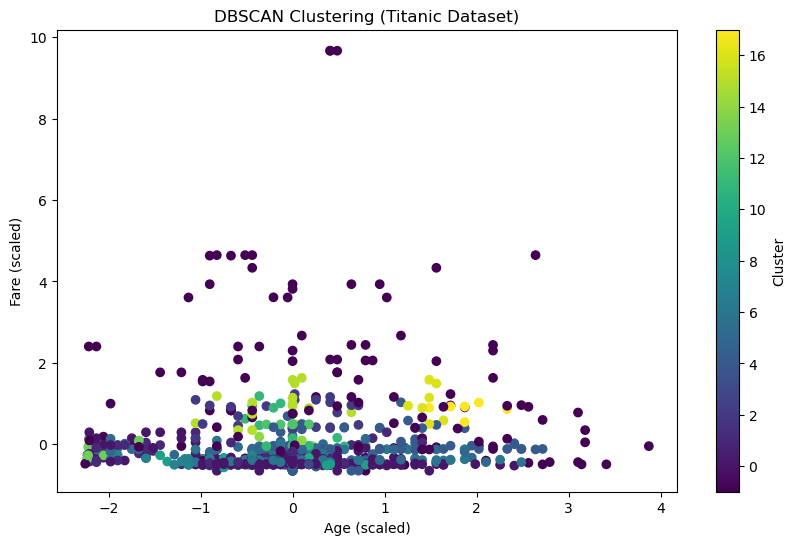

In [6]:
import matplotlib.pyplot as plt

# Select two features to visualize
X_vis = X_scaled[:, [0, 1]]  # Using 'age' and 'fare' for visualization

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=titanic['cluster'], cmap='viridis', marker='o')
plt.title("DBSCAN Clustering (Titanic Dataset)")
plt.xlabel("Age (scaled)")
plt.ylabel("Fare (scaled)")
plt.colorbar(label='Cluster')
plt.show()


## Task no 2. 
implement the Entropy and information Gain for the dataset of your own choice

In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import numpy as np

# Function to calculate entropy
def entropy(values):
    # Calculate the frequency of each unique value
    value_counts = np.bincount(values)
    probabilities = value_counts / len(values)
    # Calculate entropy using the formula: -sum(p * log2(p))
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))  # adding epsilon to avoid log(0)

# Function to calculate information gain for a feature
def information_gain(data, feature, target):
    # Calculate the entropy of the target before splitting
    initial_entropy = entropy(data[target])
    
    # Calculate the weighted entropy after splitting by the feature
    feature_values = data[feature].unique()
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    
    # Information gain is the difference between initial entropy and weighted entropy
    return initial_entropy - weighted_entropy

# Calculate entropy for the target variable 'Survived'
target = 'Survived'
entropy_survived = entropy(data[target])

# Calculate information gain for the feature 'Pclass'
feature = 'Pclass'
info_gain_pclass = information_gain(data, feature, target)

# Separate the print statements for entropy and information gain
print("Entropy of Survived:", entropy_survived)
print("Information Gain for Pclass:", info_gain_pclass)


Entropy of Survived: 0.9607078989902569
Information Gain for Pclass: 0.08383104529601171
